<a href="https://colab.research.google.com/github/nickwharff/CS167_Notes/blob/main/Day02_P1_Pandas_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day02 
## Part 1 Pandas Tutorial

#### CS167: Machine Learning, J-Term 2023

Wednesday, January 4th, 2023 -- Session I (9:00-10:15)

[⏮ Day01 Part 2](https://github.com/merriekay/j23_cs167_notes/blob/main/Day01_Part2_Python_and_Pandas.ipynb)  | [Day02 Part 2 ⏭](https://github.com/merriekay/j23_cs167_notes/blob/main/Day02_P2_Pandas_Exercises.ipynb)

## Admin Stuff:

You should be working on: 
- [Notebook 0](https://classroom.github.com/a/jRDX822c): Onboarding was due (although you didn't have anything to turn in) before class
- [Notebook #1](https://classroom.github.com/a/FNH0KzX1) is released today, and will be due __after class on Thursday 1/5__.

## Overview of Day02:

### Part 1:
- Pandas Tutorial
- Notebook #1

### Part 2: 
- Exercises for Pandas

# 🐼 Pandas
__Pandas__ is a super powerful Python data analysis library. 
- it's built on top of another super powerful libray called `numpy`

Using Google Colab, `pandas` should already be installed. If you see `In [*]` next to a cell, it means your computer is working on the task. 

In [1]:
#you should be able to run this without any issue.
import pandas as pd

# Overview of Pandas Tutorial

Three main goals:
1. __Overview__ of Pandas
    - Datatypes `DataFrame` and `Series`
    - helpful functions
2. Select __columns__ in DataFrames
3. Select __rows__ in DataFrames
4. Select __subsets__ of the DataFrame (both rows and columns). 

#  Pandas Basics

In `pandas`,there are two main datatypes, `DataFrame` and `Series`:

## Let's start with `DataFrame` 

[Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) defines `DataFrames` as: 
> Two-dimensional, size-mutable, potentially heterogeneous tabular data.

- basically, think of `DataFrames` as our excel sheets--two dimensional, tabular data.
- Each column has a name, and you can use these names to filter and create subsets of data. 
- often, you'll see `DataFrames` abbreviated to `df`. 

### Creating a DataFrame using `pd.read_csv()`:
While you can create a DataFrame from scratch, most often we'll be importing data from a `.csv` file:
- pandas has a helpful function for this: `pd.read_csv()`, which takes the path to the csv file as an argument [[documentation]](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#change this path to point to where your data is:
# if you're using colab it should be something like: '/content/drive/MyDrive/CS167/datasets/restaurant.csv'
#path = 'datasets/restaurant.csv'


path = '/content/drive/MyDrive/CS167/datasets/restaurant.csv'

restaurant_data = pd.read_csv(path)
print("data is a ", type(restaurant_data))

data is a  <class 'pandas.core.frame.DataFrame'>


### Other ways of creating DataFrames:
The syntax for creating a DataFrame from scratch looks like this: 
- `pandas.DataFrame(data, index, columns)`


In [16]:
df = pd.DataFrame() #creates an empty dataframe
df

""


In [17]:
# initialize list elements
data = [10,20,30,40,50,60]
 
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Numbers'])
 
# print dataframe.
df

,Numbers
0,10
1,20
2,30
3,40
4,50
5,60


#### Creating DataFrame from 2D list:

In [18]:
# initialize list of lists
data = [['tom', 89], ['juan', 99], ['juli', 93]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Score'])
 
# print dataframe.
df

,Name,Score
0,tom,89
1,juan,99
2,juli,93


### 📣 Helpful Method Alert: `df.head()`

The `.head()` method can be called on any DataFrame, and by default will display the first 5 lines rows of the data, as well as the names of the columns. 
- if you want it to display more than 5 rows, you can provide a number as an argument to the method.

In IPython notebooks, whatever you leave at the end of a cell will automatically output.

So, when you put those two facts together, you get this nifty functionality: 

In [19]:
restaurant_data.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


### 📣 Helpful Attribute Alert: `df.shape`
Want to know the dimensions of your DataFrame? Use `df.shape`

Lists (rows,columns)

In [22]:
restaurant_data.shape

(12, 11)

## Columns Names

Want to see a list of all of the columns in your dataset? Try using `df.columns`

In [26]:
col = restaurant_data.columns
col[1]

predictors = col[:10] # can do this to exclude target category
predictors

Index(['alt', 'bar', 'fri', 'hun', 'pat', 'price', 'rain', 'res', 'type',
       'est'],
      dtype='object')

If there are no spaces in the name of a column, you can also reference it using dot notation like so:

In [27]:
restaurant_data.fri # return same hting
restaurant_data['fri'] # return same thing

0      No
1      No
2      No
3     Yes
4     Yes
5      No
6      No
7      No
8     Yes
9     Yes
10     No
11    Yes
Name: fri, dtype: object

## Selecting Rows in DataFrames using `loc` and `iloc`:
Simply put:
- `loc` gets DataFrame rows and columns by __labels/names__ 
- `iloc` gets DataFrame rows and columns by __index/position__

In [30]:
#change this path to point to where your data is:
# if you're using colab it should be something like: '/content/drive/MyDrive/CS167/datasets/titanic.csv'
# path = 'datasets/titanic.csv'
path = '/content/drive/MyDrive/CS167/datasets/titanic.csv'

titanic = pd.read_csv(path)
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
titanic.loc[886];  ## 886 is really a "name", not a number - shows row named 886
titanic.iloc[886];  ## 886 is now a index number using iloc - shows row indexed 886
# these are the same if you are using the full data set

survived                 0
pclass                   2
sex                   male
age                   27.0
sibsp                    0
parch                    0
fare                  13.0
embarked                 S
class               Second
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                 True
Name: 886, dtype: object

Let's take a subset of titanic and try to use `loc` and `iloc`: 

In [39]:
subset = titanic.loc[880:885] # beginning at 880 and including 885
subset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [42]:
subset.loc[880]
# subset.iloc[880] # can't do this as there is no index 880 in the subset
# would have to do 
subset.iloc[0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True


`iloc[x:y]` starts at x and __includes__ y

`iloc` is __inclusive__

`loc[x:y]` starts at x and goes __until__ y

`loc` is __exclusive__


## Pandas Datatypes: `Series`
- `Series` are 1D arrays with axis labels that have the same type. 
    - Each __row__ in a DataFrame is a `Series`.
    - Each __column__ in a DataFrame is also a `Series`.

In [ ]:
print(type(restaurant_data.iloc[0])) #the first row in the dataframe
print(type(restaurant_data['type'])) #the column 'type' from the dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
subset.loc[880] #works
subset.iloc[880] #broken.... how would you fix it?

# Subsetting Columns
<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day02_subset_cols.png?raw=1"/ width=600>
</div>

Why might we want a subset of the columns of a DataFrame?

Sometimes you don't need all of the columns and just want to work with a __subset__ of the colummns of the original dataset. Other times, you may want to reorder the columns in your dataset.

Here's how you would do either of those: 
The syntax for subsetting columns from a DataFrame (`df`) is:
- __One column:__ `df['column_name']`
- __Multiple columns:__ `df[['column1', 'column2', 'target']]`

So, if we wanted to look at the `price` column, we could do: 

In [43]:
restaurant_data.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [45]:
prices = restaurant_data['price']
prices.head()

0    $$$
1      $
2      $
3      $
4    $$$
Name: price, dtype: object

Imagine you want to only work with `'rain'`, `'hun'`, and `'target'`:

In [44]:
col_subset = restaurant_data[['rain', 'hun', 'target']]
col_subset.head()

,rain,hun,target
0,No,Yes,Yes
1,No,Yes,No
2,No,No,Yes
3,No,Yes,Yes
4,No,No,No


Maybe you want to re-order your new subset so that `rain` and `hun` are switched:

In [46]:
reordered = col_subset[['hun', 'rain', 'target']]
reordered.head()

,hun,rain,target
0,Yes,No,Yes
1,Yes,No,No
2,No,No,Yes
3,Yes,No,Yes
4,No,No,No


## 💬 Group Exercise: 

Download the Titanic Dataset from Blackboard, upload it to a spot in your GoogleDrive, and see if you can make the following subsets: 
- make a subset called `ages` that holds the ages of the passengers on the titanic
- create a subset called `titanic_subset` with the columns `survived`, `deck`, `sex`, and `age`, in that order.

In [54]:
titanic.head()

ages = titanic['age']
ages.head()

titanic_subset = titanic[['survived','deck','sex','age']]
titanic_subset.head()

,survived,deck,sex,age
0,0,NaN,male,22.0
1,1,C,female,38.0
2,1,NaN,female,26.0
3,1,C,female,35.0
4,0,NaN,male,35.0


# Subsetting Rows in a DataFrame:
<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day02_subset_rows.png?raw=1"/ width=600>
</div>
Why might you want a subset of the rows?

Maybe you want only rows that satisfy a certain condition--in the restaurant dataset, maybe:
- Italian Restaurants
- only examples when it didn't rain
- etc. 

To understand the syntax for subsetting rows in a DataFrame, we need to understand how conditionals work in Python/Pandas:
- to check whether each row in a dataframe meets a criteria, you can use the following syntax
- it will return a `Series` with `True`/`False`, where rows that are `True` meet the criteria, and `False` do not. 

In [55]:
restaurant_data['type'] == 'Italian'

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11    False
Name: type, dtype: bool

Taking this one step further, we can use this boolean Series to filter our rows: 
- `subset_rows = df[df['column name'] == 'something']`

In [63]:
# the conditional from a few slides ago was:
condition = restaurant_data['type'] == 'Italian' 

italian_rest = restaurant_data[condition] # all of rows in data set where it is 'TRUE'
italian_rest

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


In [57]:
# or in one step: 
italian_restaurants = restaurant_data[ restaurant_data['type'] == 'Italian' ]
italian_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


In [59]:
french_restaurants = restaurant_data[ restaurant_data['type'] == 'French']
french_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


to add a conditional in this

`(restaurant_data['type'] == 'French') | (restaurant_data['type'] == 'Italian')`

`|` means _or_

`&` means _and_

`~=` means _not equal_

## Try it out yourself:

See if you can create a subset called `rainy_day`, of rows where it rained.

In [64]:
restaurant_data.head()
rainy_day = restaurant_data[restaurant_data['rain'] == 'Yes'] #insert your code here to get the output below
rainy_day

# rainy_day.loc[6] = rainy_day.iloc[1]

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No


# Subsetting Columns and Rows

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day02_subset_rowsandcols.png?raw=1"/ width=500>
</div>

Let's imagine we want a subset that contains the names and ages of people who did not survive the Titanic. 

Techincally, you have the knowledge now to be able to do this, if you just break it up into two steps
- make a subset, `victims`, of rows where `survived == 0`
- use `victims` to create a second subset that only contains the `'Age'` column.

# Have to remove Rows first!
- or else you will not have necessary data 

In [66]:
victims = titanic[titanic.survived==0]
victims.head()

victims_subset = victims['age']
victims_subset.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

In [68]:
subset = victims['age']
subset.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

But... we can actually do this on one step if we use `loc`/`iloc`:

`df.loc[df.row == "something", "column_title"]`


In [69]:
ages = titanic.loc[titanic.survived == 0, 'age'] #the first arguement is the condition for the rows, the second is the columns
ages.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

# Some Handy Functions
## `mean()`
Mean will calculate the average of whatever numeric data you call it on. 

Here we are calculating the average age of all titanic passengers. 

>Note that you can write the column in dot notation or bracket notation, either works.

In [ ]:
#average age of titanic passengers:
titanic.age.mean()
#titanic['age'].mean()

29.69911764705882

## `median()`
Median will return the median number of a numeric column. 

Here we are calculating the median ticket fare for all titanic passengers:

In [70]:
#median ticket fare for titanic passengers:
titanic.fare.median()

#titanic['fare'].median()

14.4542

## `sum()`
Sum will return the sum of whatever data you pass into it. 

Here, since 'survived' is a column with 0s and 1s, we can take the sum to get the number of survivors.

In [72]:
#number of survivors
survived = titanic.survived.sum()

total_num_people = titanic.shape[0]

did_not_survive = total_num_people - survived
did_not_survive

549

## `unique()`
Unique will return the unique values in a given column. 

In [73]:
#get the unique values of the Deck column
titanic.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

## `groupby()`
Let's you split data up by possible values in a categorical column and do something to that split. 

For example,  here we have a split of the average age of survivors and non-survivers on the titanic.

`df.groupby(['type1'])['type2'].mean()`

In [74]:
titanic.groupby(['survived'])['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

## `hist()`
will create a histogram of whatever data you call it on

`df.type.hist()`

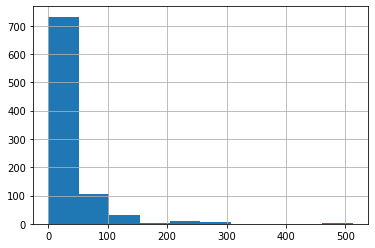

In [75]:
titanic.fare.hist()

## `describe()`
Will give you the count, mean, standard deviation, min, 25%, 50%, 75% and max of any columns with numeric data. 

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
